<a href="https://colab.research.google.com/github/fbrunosantos/Analise_ObjetosEspaciais/blob/main/Analise_spaceDecay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Analise do dataset de Satélites e Detritos na órbita da Terra**



Esta é a primeira análise realizada, uma atividade do grupo de estudos da Universidade dos Dados.

O dataset foi obtido no kaggle. Trata-se de dados sobre objetos espaciais com informações como: tamanho, data de lançamento, tipo de objeto, local de lançamento, qual país resoponsável, entre outras.


## **Carregando os dados**

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#carregando os dados
dados = pd.read_csv("space_decay.csv")
dados.head()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [ ]:
#número total de linhas e colunas
dados.shape

(14372, 40)

In [ ]:
#Verifica informações gerais do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [ ]:
#Verifica numero de dados faltantes
dados.isna().sum()

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                 39
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                 198
COUNTRY_CODE              39
LAUNCH_DATE               39
SITE                      39
DECAY_DATE    

In [ ]:
#Mostra todas as colunas do dataset escolhido
dados.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

In [ ]:
dados.describe()

,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,...,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.0,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000,14372.0,...,14372.000000,1.437200e+04,14372.000000,14372.000000,14372.000000,14372.000000,14333.000000,0.0,1.437200e+04,1.437200e+04
mean,2.0,12.463847,0.067168,74.354208,182.353111,165.977199,191.015595,0.0,39558.160381,999.0,...,0.000049,2.307751e-07,10636.185210,223.521557,5721.060178,2795.040245,2004.507570,NaN,3.194186e+06,1.885638e+08
std,0.0,4.509305,0.181547,29.626780,116.717713,104.461866,109.873807,0.0,7619.846133,0.0,...,0.002391,1.485939e-05,9580.627227,446.517041,13016.299008,7943.045264,13.565227,NaN,3.119117e+03,1.393616e+05
min,2.0,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.0,26741.000000,999.0,...,-0.014873,-4.210300e-05,6542.850000,87.783000,183.393000,73.279000,1961.000000,NaN,3.142499e+06,1.860926e+08
25%,2.0,13.452144,0.000725,53.055300,71.987350,77.363475,90.001600,0.0,33965.750000,999.0,...,0.000001,0.000000e+00,6956.246750,96.232750,599.876000,546.115000,1997.000000,NaN,3.194431e+06,1.885665e+08
50%,2.0,14.277052,0.003416,86.369200,189.460250,150.483900,206.957400,0.0,40165.500000,999.0,...,0.000010,0.000000e+00,7177.549000,100.861000,843.686000,702.433500,2002.000000,NaN,3.194950e+06,1.885986e+08
75%,2.0,14.963745,0.013505,98.565125,292.484750,258.328550,284.163200,0.0,45173.500000,999.0,...,0.000032,0.000000e+00,7468.055000,107.046000,1207.919500,831.959750,2018.000000,NaN,3.195064e+06,1.886107e+08
max,2.0,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,0.0,270288.000000,999.0,...,0.225321,1.654800e-03,304049.635000,27808.429000,372136.402000,224547.015000,2021.000000,NaN,3.195727e+06,1.886250e+08



## **Preparação dos dados**

In [ ]:
#escolhendo colunas as quais vamos analisar
dados1 = dados[['OBJECT_NAME', 'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE', 'SEMIMAJOR_AXIS', 'PERIOD']]
dados1.head()

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
0,ARIANE 42P+ DEB,DEBRIS,MEDIUM,FR,1992.0,FRGUI,20668.618,492.864
1,SL-8 DEB,DEBRIS,SMALL,CIS,1979.0,PKMTR,7358.038,104.689
2,GSAT 1,PAYLOAD,LARGE,IND,2001.0,SRI,41197.852,1386.984
3,CZ-4 DEB,DEBRIS,SMALL,PRC,1999.0,TSC,7015.076,97.456
4,CZ-4 DEB,DEBRIS,SMALL,PRC,1999.0,TSC,7031.400,97.796


In [ ]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECT_NAME     14372 non-null  object 
 1   OBJECT_TYPE     14372 non-null  object 
 2   RCS_SIZE        14174 non-null  object 
 3   COUNTRY_CODE    14333 non-null  object 
 4   LAUNCH_DATE     14333 non-null  float64
 5   SITE            14333 non-null  object 
 6   SEMIMAJOR_AXIS  14372 non-null  float64
 7   PERIOD          14372 non-null  float64
dtypes: float64(3), object(5)
memory usage: 898.4+ KB


In [ ]:
#Verificar entre essas colunas quais têm dados faltantes
dados1.isna().sum()

OBJECT_NAME         0
OBJECT_TYPE         0
RCS_SIZE          198
COUNTRY_CODE       39
LAUNCH_DATE        39
SITE               39
SEMIMAJOR_AXIS      0
PERIOD              0
dtype: int64

In [ ]:
#verificando dados duplicados na base
objects_unique = dados1.OBJECT_NAME.unique()
len(objects_unique)

5372

In [ ]:
#drop_duplicates para excluir de uma nova base criada os valores duplicados
space_objects = dados1.drop_duplicates(subset=['OBJECT_NAME'])
space_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 0 to 14333
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECT_NAME     5372 non-null   object 
 1   OBJECT_TYPE     5372 non-null   object 
 2   RCS_SIZE        5358 non-null   object 
 3   COUNTRY_CODE    5371 non-null   object 
 4   LAUNCH_DATE     5371 non-null   float64
 5   SITE            5371 non-null   object 
 6   SEMIMAJOR_AXIS  5372 non-null   float64
 7   PERIOD          5372 non-null   float64
dtypes: float64(3), object(5)
memory usage: 377.7+ KB


## **Análise dos dados gerais**

Vamos ver a quantidade de cada tipo de objeto:

In [ ]:
space_objects['OBJECT_TYPE'].value_counts(normalize=True)*100


PAYLOAD        92.069993
DEBRIS          5.379747
ROCKET BODY     1.545048
TBA             1.005212
Name: OBJECT_TYPE, dtype: float64

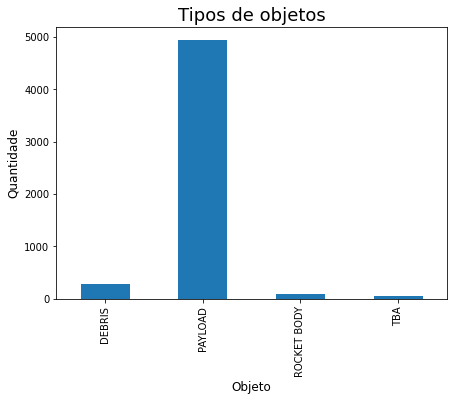

In [ ]:
a1 = space_objects.groupby(['OBJECT_TYPE']).OBJECT_TYPE.size().plot(kind='bar', figsize=(7, 5))
a1.set_title("Tipos de objetos", fontsize= 18)
a1.set_xlabel("Objeto", fontsize=12)
a1.set_ylabel("Quantidade", fontsize=12)
plt.show()


Podemos ver que a maior parte dos objetos catalogados no dataset se referem a 'Payloads' que são a carga paga enviada no lançamento dos foguetes em determinadas missões.

*   92% dos objetos são de cargas paga
*   5% são detritos espaciais (podem ser ferramentas, pedaços de satélites, restos de acidentes, etc)
*   1,5% são partes do corpo de foguete.
*   1% não foram identificados






In [ ]:
space_objects['RCS_SIZE'].value_counts(normalize=True)*100

LARGE     62.299365
SMALL     19.596865
MEDIUM    18.103770
Name: RCS_SIZE, dtype: float64

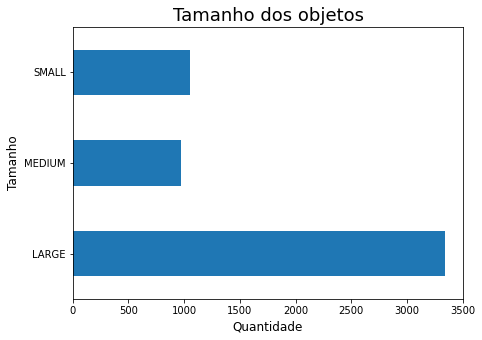

In [ ]:
a1 = space_objects.groupby(['RCS_SIZE']).RCS_SIZE.size().plot(kind='barh', figsize=(7, 5))
a1.set_title("Tamanho dos objetos", fontsize= 18)
a1.set_xlabel("Quantidade", fontsize=12)
a1.set_ylabel("Tamanho", fontsize=12)
plt.show()

Vemos aqui que como a maior parte dos objetos são payload a quantidade de objetos grandes é grande, o que já era esperado.

In [ ]:
df_date = space_objects.sort_values(['LAUNCH_DATE'])
df_date.head()

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
223,MIDAS 4 DEB,DEBRIS,MEDIUM,US,1961.0,AFWTR,10011.564,166.155
13820,THOR ABLESTAR DEB *,DEBRIS,SMALL,US,1961.0,AFETR,7870.148,115.807
877,TIROS 6 DEB,DEBRIS,SMALL,US,1962.0,AFETR,7002.576,97.196
9510,WESTFORD NEEDLES,DEBRIS,MEDIUM,US,1963.0,AFWTR,9995.279,165.749
6184,THOR ABLESTAR DEB,DEBRIS,SMALL,US,1963.0,AFWTR,7468.669,107.059


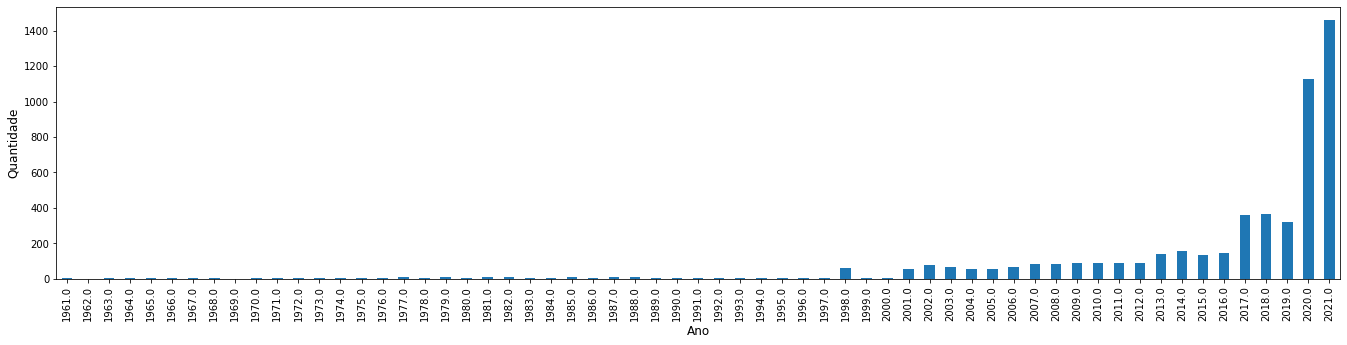

In [ ]:
a1 = df_date.groupby(['LAUNCH_DATE']).LAUNCH_DATE.count().plot(kind='bar', figsize=(23, 5))
a1.set_xlabel("Ano", fontsize=12)
a1.set_ylabel("Quantidade", fontsize=12)
plt.show()


Percebems aqui que ao longo dos anos o número de objetos lançados aumenta de forma bem perceptível. 
Um valor próximo da metade do total de objetos catalogados no dataset **(48%)** foi lançado entre os anos de 2020 e 2021.

In [ ]:
df_2021 = space_objects[space_objects['LAUNCH_DATE'] == 2021.0]
df_2021.count()


OBJECT_NAME       1461
OBJECT_TYPE       1461
RCS_SIZE          1459
COUNTRY_CODE      1461
LAUNCH_DATE       1461
SITE              1461
SEMIMAJOR_AXIS    1461
PERIOD            1461
dtype: int64

In [ ]:
df_2020 = space_objects[space_objects['LAUNCH_DATE'] == 2020.0]
df_2020.count()

OBJECT_NAME       1129
OBJECT_TYPE       1129
RCS_SIZE          1128
COUNTRY_CODE      1129
LAUNCH_DATE       1129
SITE              1129
SEMIMAJOR_AXIS    1129
PERIOD            1129
dtype: int64

In [ ]:
#Verifica o número de valores unicos para os países 
country_unique = space_objects.COUNTRY_CODE.unique()
len(country_unique)

100

Temos dados de 100 países que lançaram objetos.

Vamos ver quais são os 5 que mais lançaram.

---



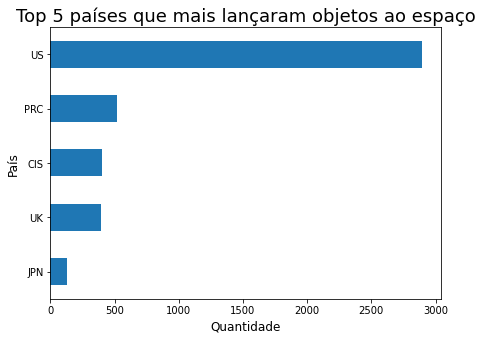

In [ ]:
a1 = space_objects.groupby(['COUNTRY_CODE']).COUNTRY_CODE.count().sort_values()[-5:].plot(kind='barh', figsize=(7, 5))
a1.set_title("Top 5 países que mais lançaram objetos ao espaço", fontsize= 18)
a1.set_xlabel("Quantidade", fontsize=12)
a1.set_ylabel("País", fontsize=12)
plt.show()

Da mesma forma, vamos ver os principais locais de lançamento:

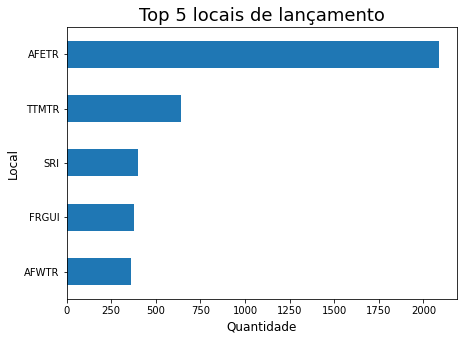

In [ ]:
a1 = space_objects.groupby(['SITE']).SITE.count().sort_values()[-5:].plot(kind='barh', figsize=(7, 5))
a1.set_title("Top 5 locais de lançamento", fontsize= 18)
a1.set_xlabel("Quantidade", fontsize=12)
a1.set_ylabel("Local", fontsize=12)
plt.show()

Top 5 locais de lançamento são:


*   AFETR - Air Force Eastern Test Range
*   TTMTR - Tyuratam Missile and Space Complex
*   SRI - Shirarikota
*   FRGUI - French Guiana
*   AFWTR - Air Force Western Test Range



## **Análise Payloads**

Agora que vimos alguns resultados para os dados gerais vamos tentar analisar algumas informações dos objetos classificados como carga paga

In [ ]:
df_payloads = space_objects[space_objects['OBJECT_TYPE'] == 'PAYLOAD']
df_payloads.head()

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
2,GSAT 1,PAYLOAD,LARGE,IND,2001.0,SRI,41197.852,1386.984
6,XM-1,PAYLOAD,LARGE,US,2001.0,SEAL,42523.710,1454.476
9,INTELSAT 10 (PAS 10),PAYLOAD,LARGE,US,2001.0,TTMTR,42164.938,1436.107
32,COSMOS 2378,PAYLOAD,LARGE,CIS,2001.0,PKMTR,7363.530,104.807
37,INTELSAT 901,PAYLOAD,LARGE,ITSO,2001.0,FRGUI,42165.355,1436.129


In [ ]:
df_payloads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4946 entries, 2 to 14332
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECT_NAME     4946 non-null   object 
 1   OBJECT_TYPE     4946 non-null   object 
 2   RCS_SIZE        4938 non-null   object 
 3   COUNTRY_CODE    4946 non-null   object 
 4   LAUNCH_DATE     4946 non-null   float64
 5   SITE            4946 non-null   object 
 6   SEMIMAJOR_AXIS  4946 non-null   float64
 7   PERIOD          4946 non-null   float64
dtypes: float64(3), object(5)
memory usage: 347.8+ KB


**Como está distruibuido o tamanho desses objetos?**

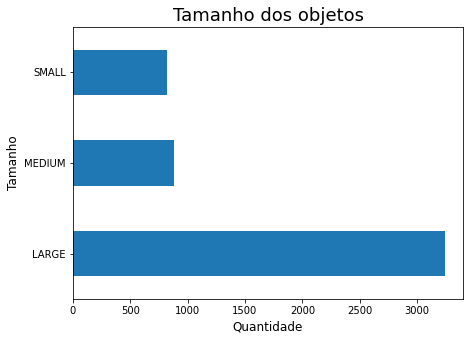

In [ ]:
a1 = df_payloads.groupby(['RCS_SIZE']).RCS_SIZE.size().plot(kind='barh', figsize=(7, 5))
a1.set_title("Tamanho dos objetos", fontsize= 18)
a1.set_xlabel("Quantidade", fontsize=12)
a1.set_ylabel("Tamanho", fontsize=12)
plt.show()

* A maior parte dos objetos payload é de tamanho grande. A quantidade de médios e pequenos é similar.

**Qual carga paga teve a maior altitude?**

In [ ]:
def max_alt(x):
    is_max = x == x.max()
    return ['background-color: pink' if v else '' for v in is_max]

In [ ]:
#Pintar de vermelho a maior
largest_payloads = df_payloads.nlargest(5, 'SEMIMAJOR_AXIS')
largest_payloads.style.apply(max_alt, subset=['SEMIMAJOR_AXIS'])

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
12240,CHANG'E 5,PAYLOAD,nan,PRC,2020.000000,WSC,304049.635000,27808.429000
9621,TESS,PAYLOAD,nan,US,2018.000000,AFETR,232396.282000,18582.472000
5662,SPEKTR R,PAYLOAD,LARGE,CIS,2011.000000,TTMTR,182331.558000,12913.754000
7398,MMS 3,PAYLOAD,LARGE,US,2015.000000,AFETR,97777.262000,5071.268000
7399,MMS 4,PAYLOAD,LARGE,US,2015.000000,AFETR,97711.435000,5066.147000


* O payload de maior altitude é da missão **CHANG'E 5** com 304.049,635 km. 

Essa foi uma missão de exploração Chinesa com destino à Lua. Teve o objetivo de coletar amostras do solo lunar.


**Quais objetos têm os maiores e menores períodos de rotação ao redor da terra?**

In [ ]:
def valor_max(x):
    is_max = x == x.max()
    return ['background-color: cyan' if v else '' for v in is_max]

In [ ]:
p1 = df_payloads.nlargest(5, 'PERIOD')
p1.style.apply(valor_max, subset=['PERIOD'])


,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
12240,CHANG'E 5,PAYLOAD,nan,PRC,2020.000000,WSC,304049.635000,27808.429000
9621,TESS,PAYLOAD,nan,US,2018.000000,AFETR,232396.282000,18582.472000
5662,SPEKTR R,PAYLOAD,LARGE,CIS,2011.000000,TTMTR,182331.558000,12913.754000
7398,MMS 3,PAYLOAD,LARGE,US,2015.000000,AFETR,97777.262000,5071.268000
7399,MMS 4,PAYLOAD,LARGE,US,2015.000000,AFETR,97711.435000,5066.147000


In [ ]:
def valor_min(x):
    is_min = x == x.min()
    return ['background-color: yellow' if v else '' for v in is_min]

In [ ]:
p2 = df_payloads.nsmallest(5, 'PERIOD')
p2.style.apply(valor_min, subset=['PERIOD'])

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
8356,WORLDVIEW 4,PAYLOAD,LARGE,US,2016.000000,AFWTR,6655.876000,90.067000
4649,SUMBANDILA,PAYLOAD,MEDIUM,SAFR,2009.000000,TTMTR,6658.345000,90.118000
9301,ECAMSAT,PAYLOAD,SMALL,US,1998.000000,TTMTR,6658.900000,90.129000
9665,REMOVEDEBRIS,PAYLOAD,MEDIUM,UK,1998.000000,TTMTR,6664.425000,90.241000
11924,STARLINK-1827,PAYLOAD,LARGE,US,2020.000000,AFETR,6673.262000,90.421000


* O objeto com maior tempo para dar uma volta completa ao redor do planeta é da missão **CHANG'E 5** que a 304.049,635 km de altitude leva 27.808 minutos.

* O objeto com menor tempo para dar uma volta completa ao redor do planeta é o satélite **WORLDVIEW 4** que a 6.655,876 km de altitude leva cerca de 90 min.

## **Análise dos detritos**

Detritos espaciais (space debris) são objetos criados por humanos que estão em órbita no planeta Terra. Estes podem ser desde pedaços de foguetes e satélites, ferramentas usadas em missões, lascas de tintas e até fragmentos resultantes de acidentes no espaço.

In [ ]:
df_debris = space_objects[space_objects['OBJECT_TYPE'] == 'DEBRIS']
df_debris.head()

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
0,ARIANE 42P+ DEB,DEBRIS,MEDIUM,FR,1992.0,FRGUI,20668.618,492.864
1,SL-8 DEB,DEBRIS,SMALL,CIS,1979.0,PKMTR,7358.038,104.689
3,CZ-4 DEB,DEBRIS,SMALL,PRC,1999.0,TSC,7015.076,97.456
8,TITAN 3C TRANSTAGE DEB,DEBRIS,SMALL,US,1965.0,AFETR,21580.311,525.831
17,CZ-3 DEB,DEBRIS,SMALL,PRC,1984.0,XSC,21286.879,515.143


In [ ]:
df_debris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 14233
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECT_NAME     289 non-null    object 
 1   OBJECT_TYPE     289 non-null    object 
 2   RCS_SIZE        284 non-null    object 
 3   COUNTRY_CODE    289 non-null    object 
 4   LAUNCH_DATE     289 non-null    float64
 5   SITE            289 non-null    object 
 6   SEMIMAJOR_AXIS  289 non-null    float64
 7   PERIOD          289 non-null    float64
dtypes: float64(3), object(5)
memory usage: 20.3+ KB


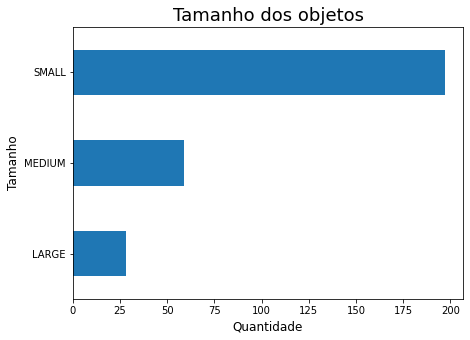

In [ ]:
a1 = df_debris.groupby(['RCS_SIZE']).RCS_SIZE.size().plot(kind='barh', figsize=(7, 5))
a1.set_title("Tamanho dos objetos", fontsize= 18)
a1.set_xlabel("Quantidade", fontsize=12)
a1.set_ylabel("Tamanho", fontsize=12)
plt.show()

**Aqui podemos verificar qual detrito está em maior altitude:**

In [ ]:
largest_debris = df_debris.nlargest(5, 'SEMIMAJOR_AXIS')
largest_debris.style.apply(max_alt, subset=['SEMIMAJOR_AXIS'])

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
10078,S5 DEB,DEBRIS,LARGE,US,2019.000000,AFETR,42528.694000,1454.731000
880,EKRAN 2 DEB,DEBRIS,MEDIUM,CIS,1977.000000,TTMTR,42203.198000,1438.063000
9744,FENGYUN 2G DEB,DEBRIS,nan,PRC,2014.000000,XSC,42179.783000,1436.866000
3277,FENGYUN 2D DEB,DEBRIS,MEDIUM,PRC,2006.000000,XSC,42172.263000,1436.482000
6845,CTS DEB (ARRAY COVER),DEBRIS,MEDIUM,CA,1976.000000,AFETR,42160.181000,1435.864000


* O detrito de maior altitude é da missão **S5 DEB** com 42.528,694 km

**Vamos ver qual o detrito leva mais e menos tempo para dar uma volta completa na Terra**

In [ ]:
d1 = df_debris.nlargest(5, 'PERIOD')
d1.style.apply(valor_max, subset=['PERIOD'])


,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
10078,S5 DEB,DEBRIS,LARGE,US,2019.000000,AFETR,42528.694000,1454.731000
880,EKRAN 2 DEB,DEBRIS,MEDIUM,CIS,1977.000000,TTMTR,42203.198000,1438.063000
9744,FENGYUN 2G DEB,DEBRIS,nan,PRC,2014.000000,XSC,42179.783000,1436.866000
3277,FENGYUN 2D DEB,DEBRIS,MEDIUM,PRC,2006.000000,XSC,42172.263000,1436.482000
6845,CTS DEB (ARRAY COVER),DEBRIS,MEDIUM,CA,1976.000000,AFETR,42160.181000,1435.864000


In [ ]:
d2 = df_debris.nsmallest(5, 'PERIOD')
d2.style.apply(valor_min, subset=['PERIOD'])

,OBJECT_NAME,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,SEMIMAJOR_AXIS,PERIOD
14233,DRAGON CRS-23 DEB,DEBRIS,LARGE,US,2021.000000,AFETR,6664.457000,90.242000
14221,SZ-12 MODULE DEB,DEBRIS,SMALL,PRC,2021.000000,JSC,6696.886000,90.901000
12601,ISS DEB (COLKA COVER),DEBRIS,MEDIUM,US,1998.000000,TTMTR,6728.527000,91.546000
14218,INSPIRATION-4 DEB,DEBRIS,LARGE,US,2021.000000,AFETR,6731.989000,91.617000
8174,RESURS P2 DEB,DEBRIS,SMALL,CIS,2014.000000,TTMTR,6744.350000,91.869000


* O detrito com maior tempo para dar uma volta completa ao redor do planeta é o **S5 DEB** que a 42.528,694 km de altitude leva 1.455 minutos.

* O detrito com menor tempo para dar uma volta completa ao redor do planeta é dos destroços da missão CRS-23 (**DRAGON CRS-23 DEB**) que a 6.664,457 km de altitude leva cerca de 90 minutos